In [190]:
import pandas as pd
import os
from tqdm import tqdm
import argparse
import yaml
import matplotlib.pyplot as plt
import tifffile
import seaborn as sns
import bokeh

from utils import *
bokeh.io.output_notebook()

Loading BokehJS ...

# Jeffrey's model analysis

In [191]:
# load data
df_results_jeff_filtered = pd.read_csv('/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/results/results_jeffreys_model_filtered.csv')
df_results_jeff_filtered.head(5)



,Unnamed: 0,EMBRYO,TRACK_ID,PULSE_NUMBER,MT_STATUS,k,eta_1,eta_2,k_err,eta_1_err,eta_2_err,R_SQUARED,AVG_FORCE,a,tau_r,Phase
0,603,20240711s01p01,1,14,y,27.236741,44.477306,183.723873,2.007962,3.253548,13.942682,0.813359,43.221133,0.583975,1.632989,Interphase
1,580,20240711s01p01,4,12,y,36.190760,70.731549,189.380867,1.633659,2.501617,6.394542,0.951881,47.917172,0.511375,1.954409,Interphase
2,578,20240711s01p01,4,10,y,74.946045,47.825019,493.635485,3.708262,4.127326,31.195872,0.705555,47.397456,0.593894,0.638126,Interphase
3,577,20240711s01p01,4,9,y,113.724679,43.644120,181.660589,9.911042,9.434256,4.645617,0.795874,47.291148,0.261976,0.383770,Interphase
4,576,20240711s01p01,4,4,y,44.098238,65.444949,10000.000000,3.472179,5.141559,29767.158697,0.811582,46.777826,0.979576,1.484072,Interphase


In [192]:
colors = sns.color_palette()

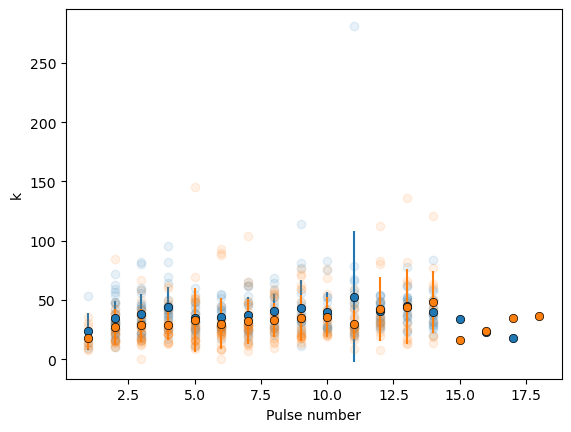

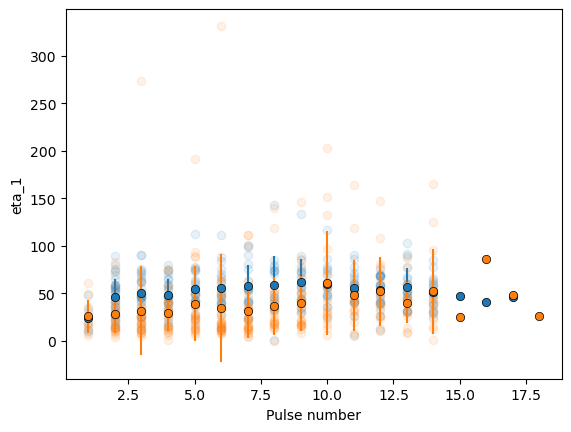

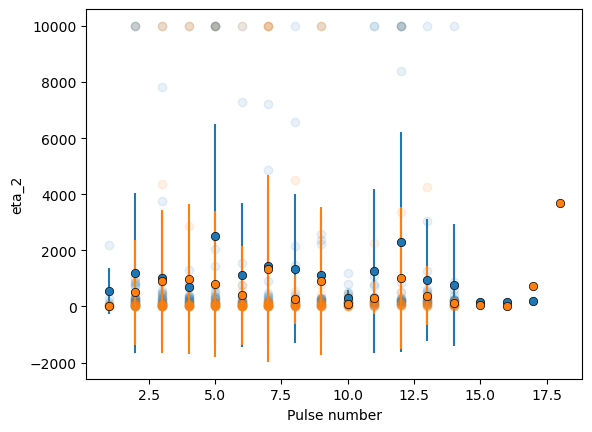

In [193]:
df_M = df_results_jeff_filtered[df_results_jeff_filtered['MT_STATUS']=='n']
df_I = df_results_jeff_filtered[df_results_jeff_filtered['MT_STATUS']=='y']


for param in ['k', 'eta_1', 'eta_2']:
    for (i, df) in enumerate([df_I, df_M]):
        plt.plot(df['PULSE_NUMBER'], df[param], 'o', color=colors[i], alpha=0.1)
        for pulse_n in df['PULSE_NUMBER'].unique():
            plt.errorbar(pulse_n, np.average(df.loc[df['PULSE_NUMBER']==pulse_n, param]), np.std(df.loc[df['PULSE_NUMBER']==pulse_n, param]), marker='o', color=colors[i], ecolor=colors[i], markeredgecolor='k', markeredgewidth=0.5)
    plt.xlabel('Pulse number')
    plt.ylabel(param)
    plt.show()

/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


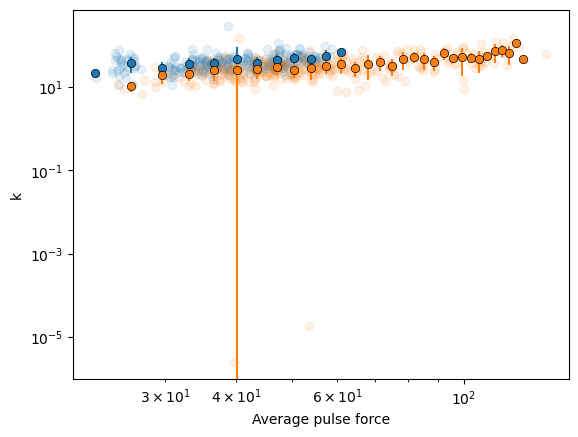

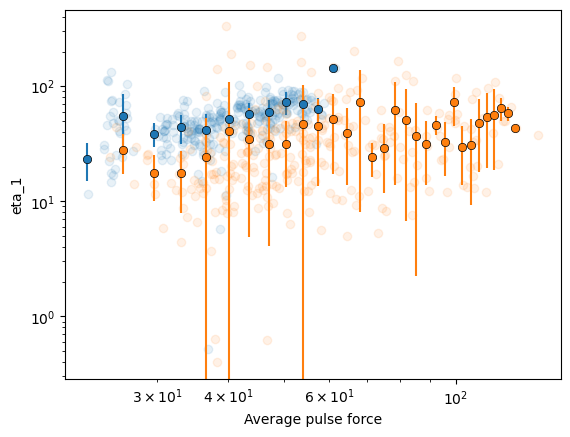

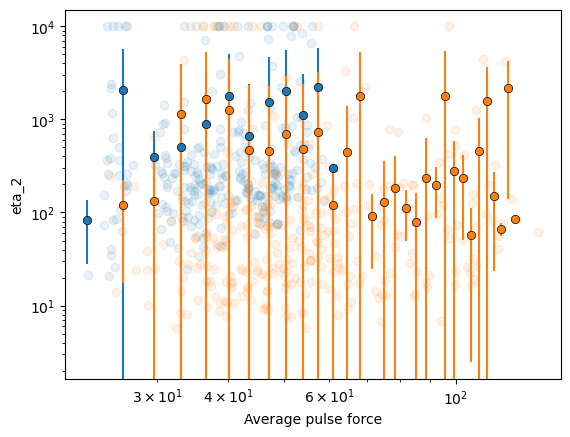

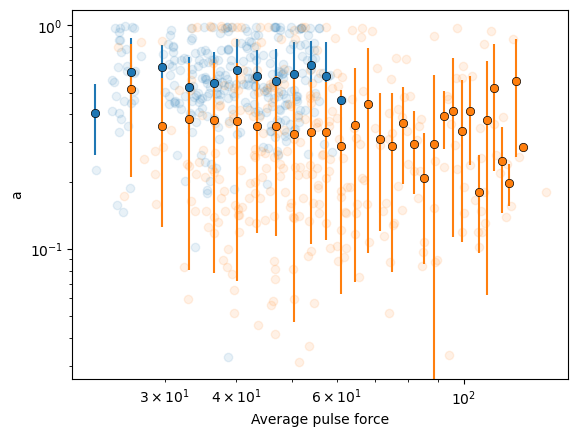

In [194]:
# filter for pulses between 1 and 15 
df_results_jeff_filtered = df_results_jeff_filtered.loc[(df_results_jeff_filtered['PULSE_NUMBER']>1)&(df_results_jeff_filtered['PULSE_NUMBER']<15)]

df_M = df_results_jeff_filtered[df_results_jeff_filtered['MT_STATUS']=='n']
df_I = df_results_jeff_filtered[df_results_jeff_filtered['MT_STATUS']=='y']

f_max = np.max(df_results_jeff_filtered['AVG_FORCE'])
N=40
for param in ['k', 'eta_1', 'eta_2', 'a']:
    for (c, df) in enumerate([df_I, df_M]):
        plt.plot(df['AVG_FORCE'], df[param], 'o', color=colors[c], alpha=0.1)
        
        for i in range(N):
            plt.errorbar(f_max/N*(0.5+i), np.average(df.loc[(f_max/N*i < df['AVG_FORCE'])&(df['AVG_FORCE'] < f_max/N*(i+1)), param]), np.std(df.loc[(f_max/N*i < df['AVG_FORCE'])&(df['AVG_FORCE'] < f_max/N*(i+1)), param]), marker='o', color=colors[c], ecolor=colors[c], markeredgecolor='k', markeredgewidth=0.5)
    plt.xlabel('Average pulse force')
    plt.ylabel(param)
    # plt.ylim(bottom=0)
    # plt.xlim(left=0)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

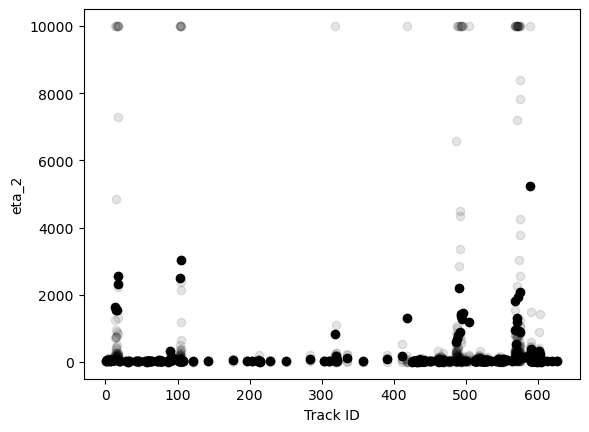

In [195]:
last_id = 0
for (i, embryo) in enumerate(df_results_jeff_filtered['EMBRYO'].unique()):
    for param in ['k', 'eta_1', 'eta_2']:
        df = df_results_jeff_filtered.loc[df_results_jeff_filtered['EMBRYO']==embryo]
        plt.plot(df['TRACK_ID']+last_id, df[param], 'ko', alpha=0.1)
        for track_id in df['TRACK_ID'].unique():
            plt.plot(track_id+last_id, np.average(df.loc[df['TRACK_ID']==track_id, param]), 'ko')
        last_id += np.max(df['TRACK_ID'])
plt.xlabel('Track ID')
plt.ylabel(param)
# plt.xlim(-1, 50)
plt.show()

# Model independent analysis

In [196]:
# load data
df_results_indp = pd.read_csv('/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/results/results_independent_analysis.csv')
df_results_indp.head(5)

# colors = sns.color_palette()

,exp_date,sample,position,embryo,rep,track_id,pulse_n,rising_dif,relaxing_dif,rising_dif_norm,relative_dif,MT_status,avg_force,rising_dif_norm_inverse
0,20240523,s01,p01,20240523s01p01,t02,7,2,18.373588,-0.960466,0.215221,0.052274,n,85.370844,4.646389
1,20240523,s01,p01,20240523s01p01,t02,7,3,10.724688,-0.794941,0.104329,0.074123,n,102.796749,9.585057
2,20240523,s02,p01,20240523s02p01,t01,0,2,2.746239,-0.797658,0.082738,0.290455,y,33.191957,12.086332
3,20240523,s02,p01,20240523s02p01,t01,0,3,2.101621,-0.587285,0.062717,0.279444,y,33.509729,15.944707
4,20240523,s02,p01,20240523s02p01,t01,0,4,1.751934,-1.045616,0.051769,0.596835,y,33.841663,19.316741


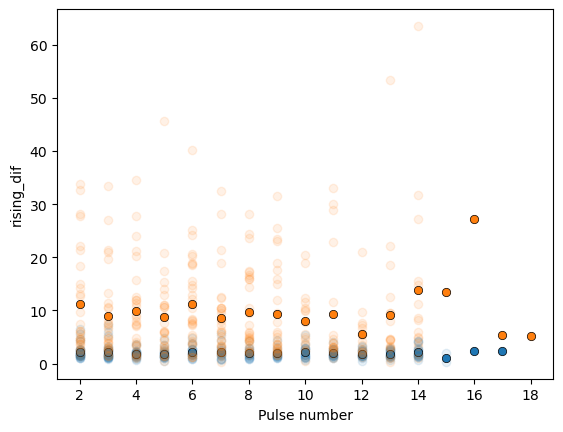

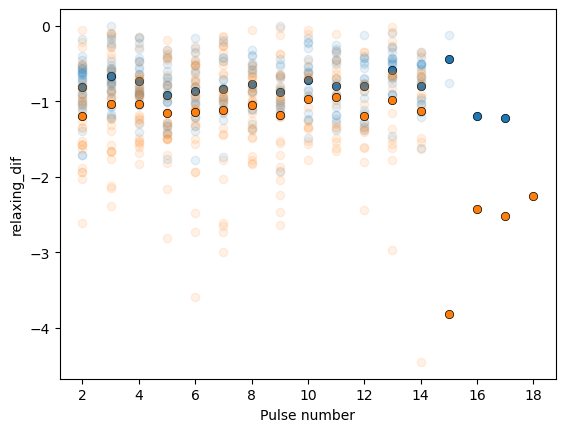

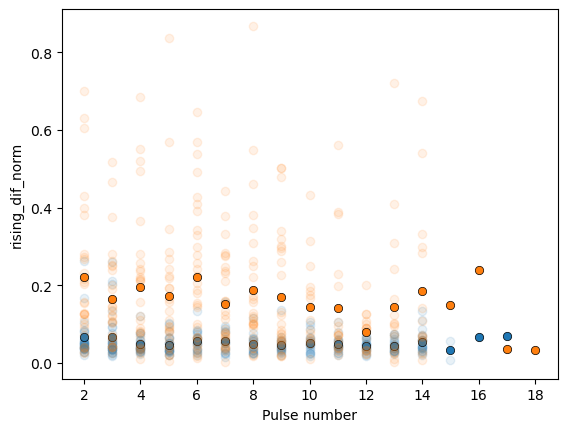

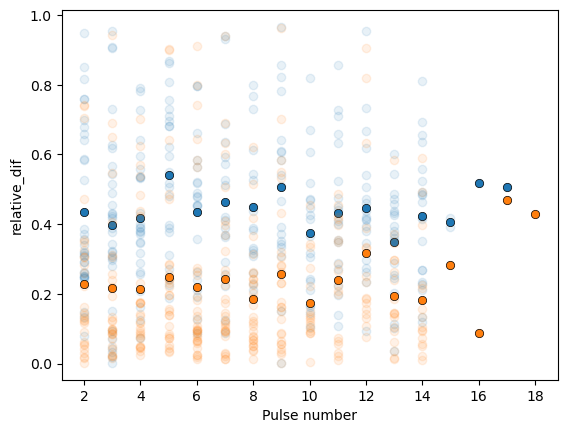

In [197]:
df_M = df_results_indp[df_results_indp['MT_status']=='n']
df_I = df_results_indp[df_results_indp['MT_status']=='y']

for param in ['rising_dif', 'relaxing_dif', 'rising_dif_norm', 'relative_dif']:
    for (i, df) in enumerate([df_I, df_M]):
        plt.plot(df['pulse_n'], df[param], 'o', color=colors[i], alpha=0.1)
        for pulse_n in df['pulse_n'].unique():
            plt.plot(pulse_n, np.average(df.loc[df['pulse_n']==pulse_n, param]), 'o', color=colors[i], markeredgecolor='black', markeredgewidth=0.5)
    plt.xlabel('Pulse number')
    plt.ylabel(param)
    plt.show()

/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


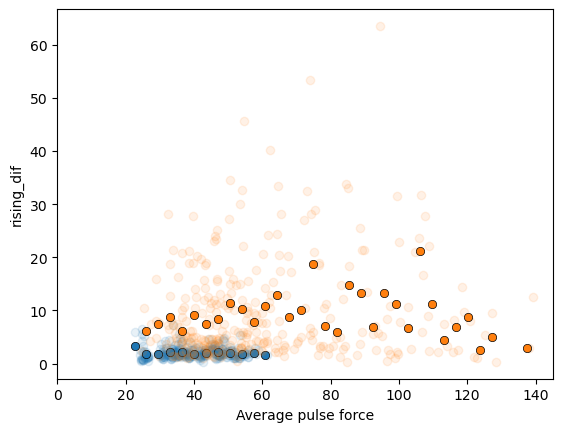

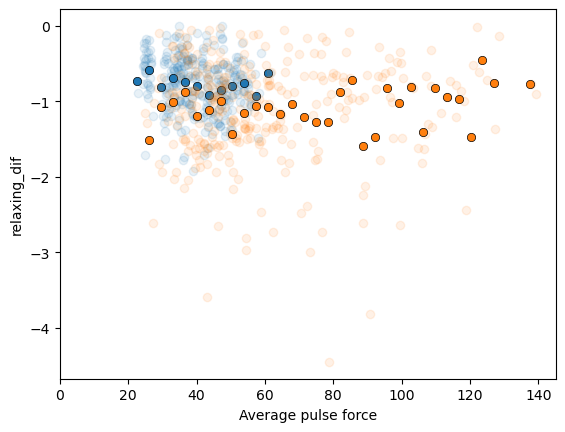

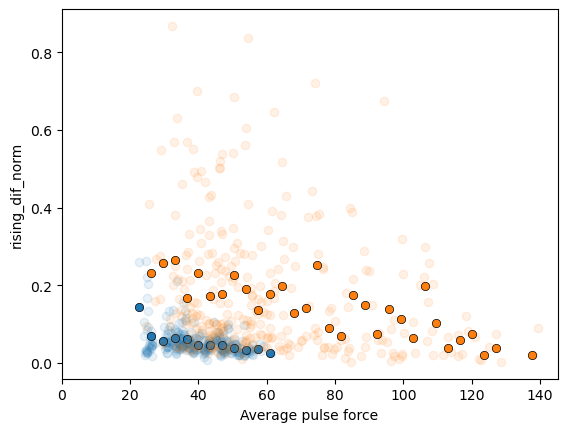

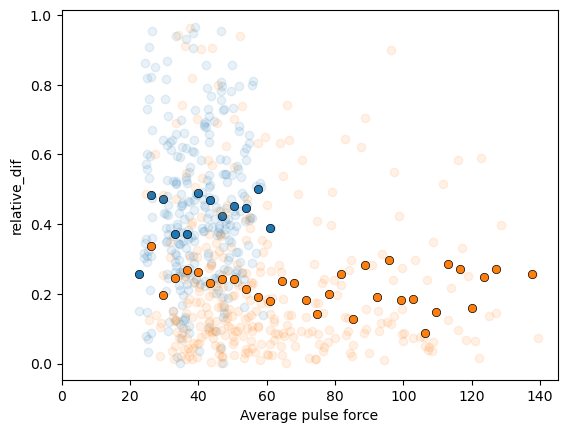

In [198]:
# filter for pulses between 1 and 15 
df_indp_filtered = df_results_indp.loc[(df_results_indp['pulse_n']>1)&(df_results_indp['pulse_n']<16)]

df_M = df_indp_filtered[df_indp_filtered['MT_status']=='n']
df_I = df_indp_filtered[df_indp_filtered['MT_status']=='y']

f_max = np.max(df_indp_filtered['avg_force'])
N=40
for param in ['rising_dif', 'relaxing_dif', 'rising_dif_norm', 'relative_dif']:
    for (c, df) in enumerate([df_I, df_M]):
        plt.plot(df['avg_force'], df[param], 'o', color=colors[c], alpha=0.1)
        
        for i in range(N):
            plt.plot(f_max/N*(0.5+i), np.average(df.loc[(f_max/N*i < df['avg_force'])&(df['avg_force'] < f_max/N*(i+1)), param]), 'o', color=colors[c], markeredgecolor='black', markeredgewidth=0.5)
    plt.xlabel('Average pulse force')
    plt.ylabel(param)
    plt.xlim(left=0)
    plt.show()

In [199]:
# df_results_jeff = pd.read_csv('/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/results/results_jeffreys_model.csv')
# df_results_jeff.head(5)


In [200]:
import h5py

folder = '/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/2_analysis/measurements_extended_info/'

df_all_tracks = pd.DataFrame()
for file in os.listdir(folder):
    if file.endswith('.h5'):
        # Read the data using pandas
        df = pd.read_hdf(folder+file)
        df['file'] = file
        df_all_tracks = pd.concat([df_all_tracks, df])

df_all_tracks.head(5)

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PULSE_NUMBER,FORCE [pN],MT_STATUS,DISPLACEMENT [um],CORRECTION_k,CORRECTION_k_ERR,CORRECTION_N,CORRECTION_N_ERR,CORRECTED DISPLACEMENT [um],file
2043,ID97720,97720,5,14.896363,334.728759,11.783371,0.0,0.0,0,3.0,...,0,0.0,n,0.0,NaN,NaN,NaN,NaN,NaN,20240621_s01p01t02_2_5sON_15sOFF_spots_extende...
2641,ID97719,97719,6,23.903294,317.583982,11.932881,0.0,0.0,0,3.0,...,0,0.0,n,0.0,NaN,NaN,NaN,NaN,NaN,20240621_s01p01t02_2_5sON_15sOFF_spots_extende...
1443,ID97723,97723,3,53.809006,329.900186,55.755008,0.0,0.0,0,3.0,...,0,0.0,n,0.0,NaN,NaN,NaN,NaN,NaN,20240621_s01p01t02_2_5sON_15sOFF_spots_extende...
243,ID97722,97722,0,14.993894,267.417427,21.522836,0.0,0.0,0,3.0,...,0,0.0,n,0.0,NaN,NaN,NaN,NaN,NaN,20240621_s01p01t02_2_5sON_15sOFF_spots_extende...
844,ID97724,97724,2,72.903885,317.279463,60.496021,0.0,0.0,0,3.0,...,0,0.0,n,0.0,NaN,NaN,NaN,NaN,NaN,20240621_s01p01t02_2_5sON_15sOFF_spots_extende...


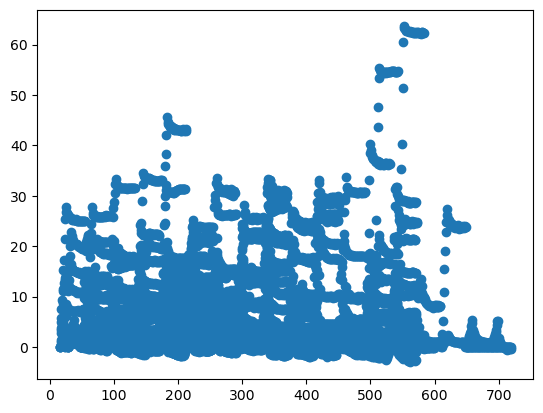

In [201]:
plt.plot(df_all_tracks['POSITION_T'], df_all_tracks['CORRECTED DISPLACEMENT [um]'], 'o')
plt.show()

In [202]:
print(df_all_tracks['FORCE [pN]'].max())

193.52194535082626


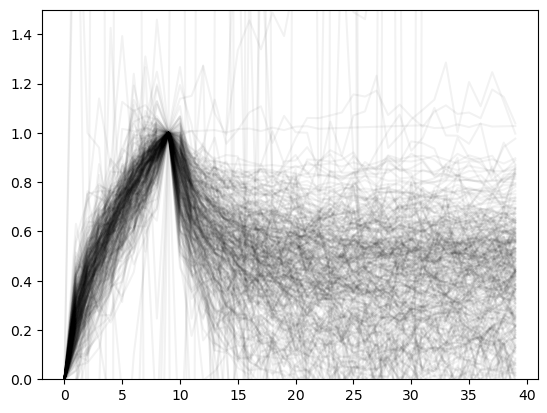

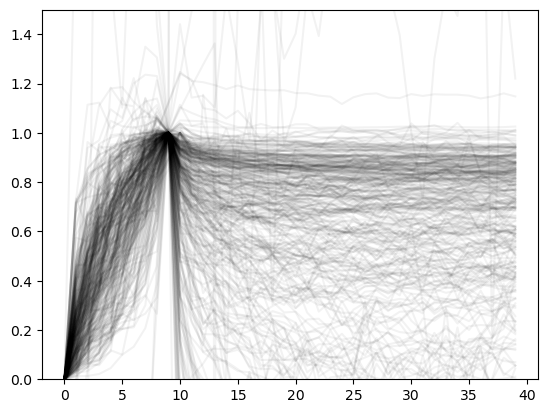

In [203]:
df_all_tracks.sort_values(by='POSITION_T', inplace=True)

# df_all_tracks = df_all_tracks.loc[(df_all_tracks.loc[df_all_tracks'FORCE [pN]']>0)&(df_all_tracks['FORCE [pN]']<100)]

for file in df_all_tracks['file'].unique():
    for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
        for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
            df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='y')]
            if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]):
                continue
            plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['CORRECTED DISPLACEMENT [um]']/df['CORRECTED DISPLACEMENT [um]'].values[len(df.loc[df['MAGNET_STATUS']==1])-1], 'k-', alpha=0.05)

plt.ylim(0, 1.5)
plt.show()

for file in df_all_tracks['file'].unique():
    for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
        for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
            df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='n')]
            if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]):
                continue
            plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['CORRECTED DISPLACEMENT [um]']/df['CORRECTED DISPLACEMENT [um]'].values[len(df.loc[df['MAGNET_STATUS']==1])-1], 'k-', alpha=0.05)
plt.ylim(0, 1.5)
plt.show()

In [204]:
for track_id in df_all_tracks['TRACK_ID'].unique():
    for pulse in df_all_tracks.loc[df_all_tracks['TRACK_ID']==track_id, 'PULSE_NUMBER'].unique():
        df_all_tracks.loc[(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse), 'AVG_FORCE'] = np.average(df_all_tracks.loc[(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MAGNET_STATUS']==1), 'FORCE [pN]'])
print(df_all_tracks['AVG_FORCE'].values)

/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[         nan          nan          nan ... 157.66221361 104.85409353
  35.10802449]


20


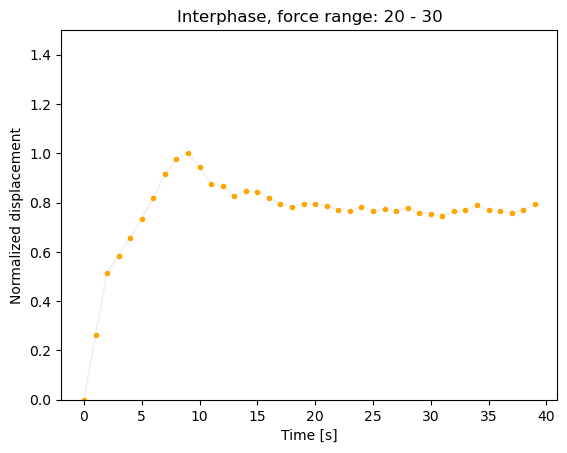

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


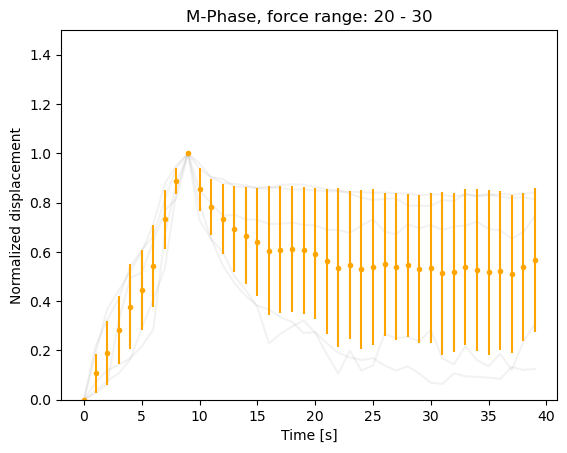

30


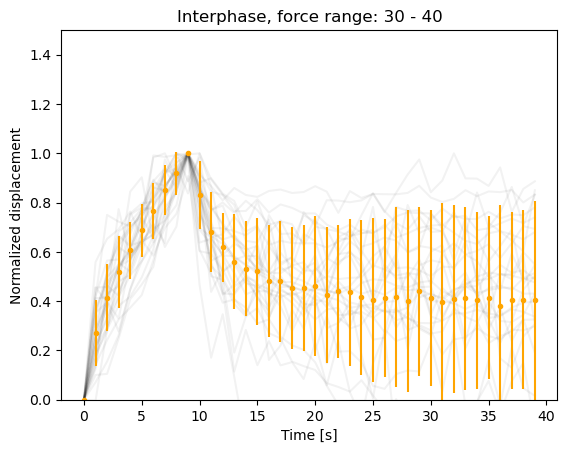

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


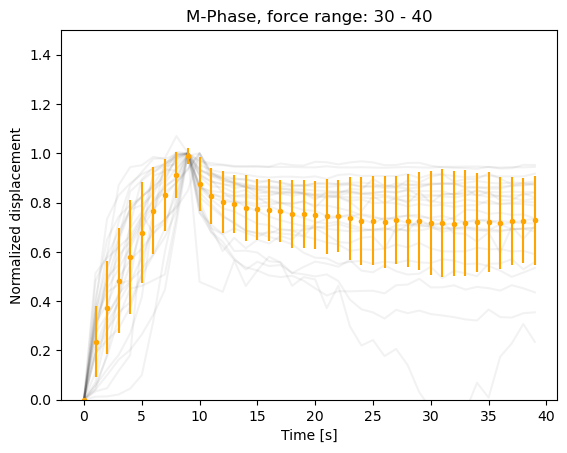

40


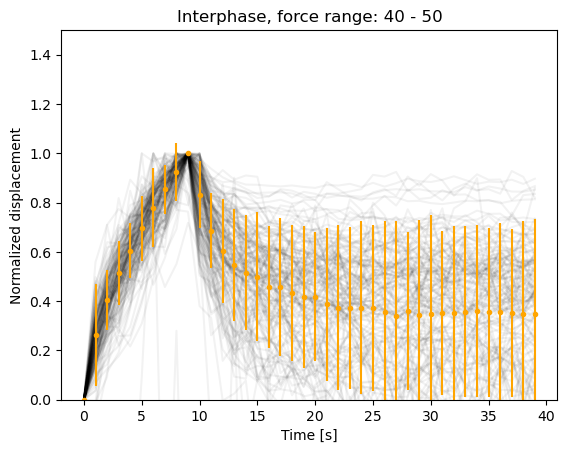

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


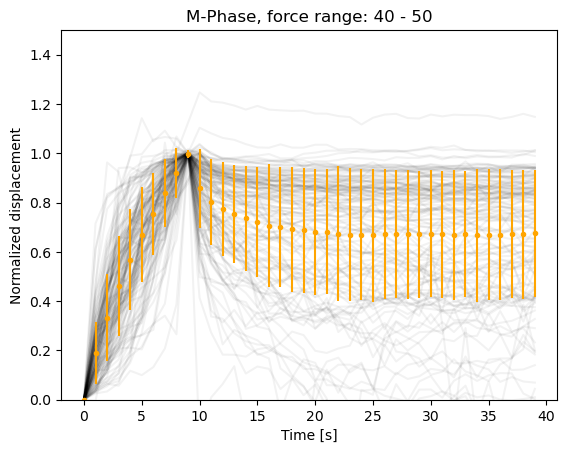

50


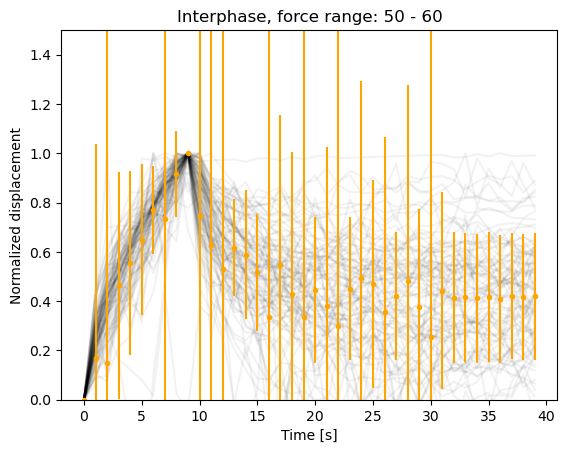

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


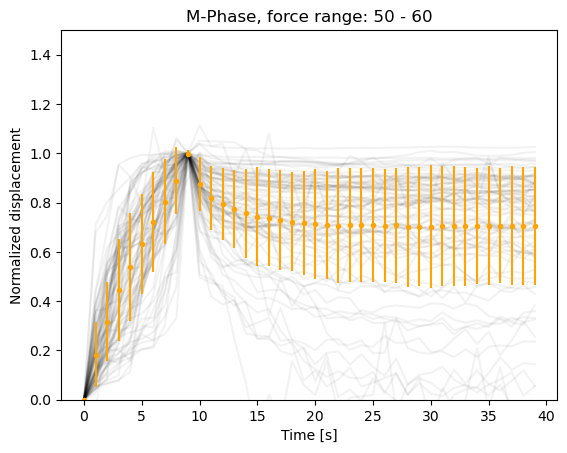

60


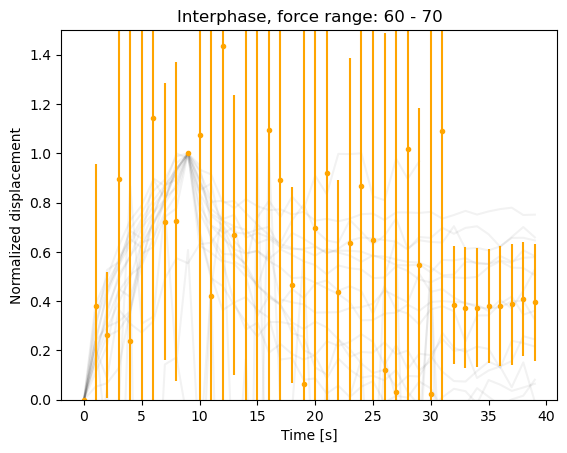

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


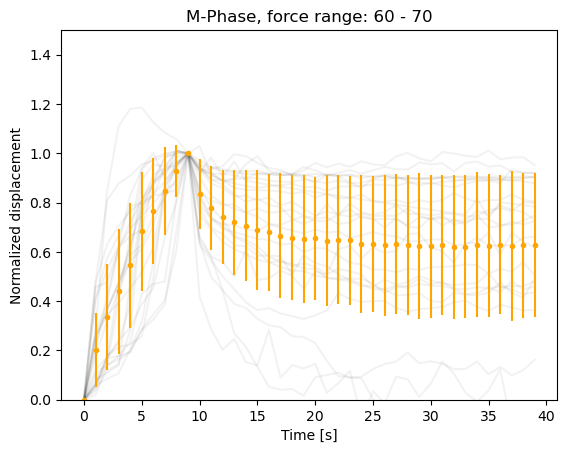

70


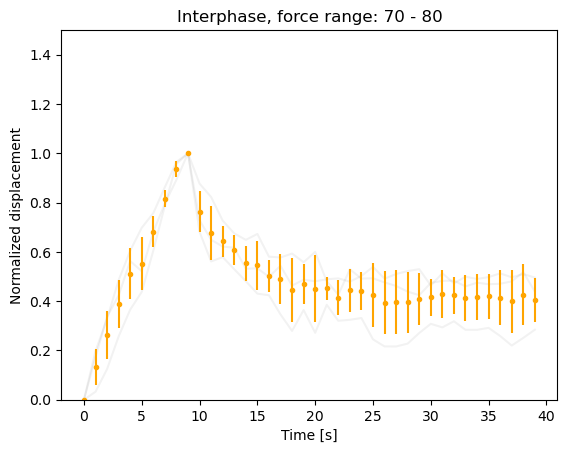

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


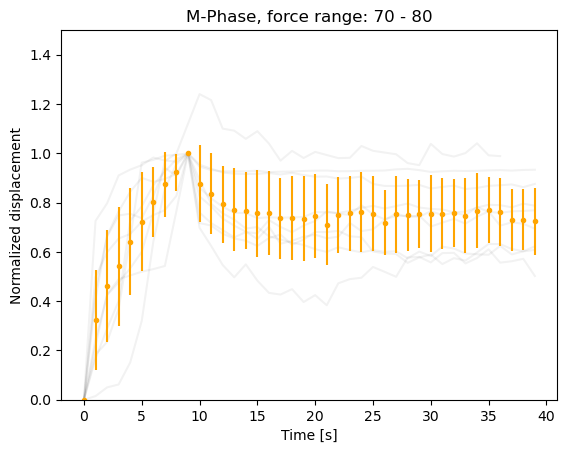

80


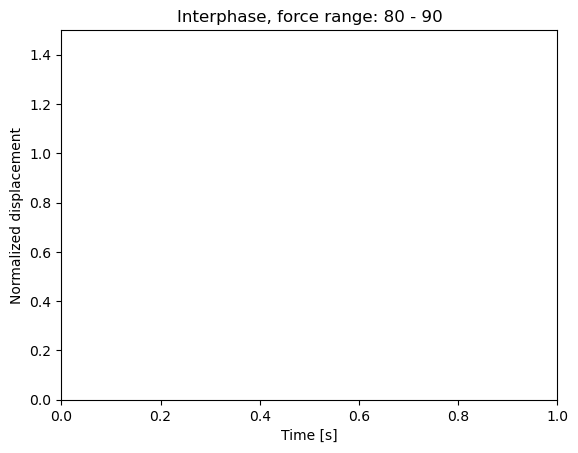

/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/1755696652.py:40: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


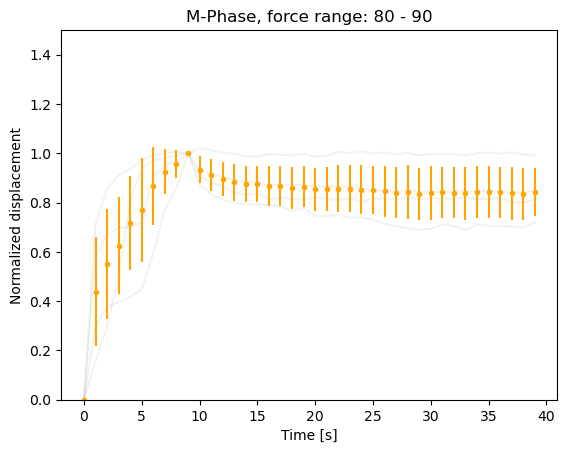

In [205]:
force_window = 10
max_force = 100

for force_lower_bound in [f for f in range(20, max_force-force_window, force_window)]:
    print(force_lower_bound)
    avg_response = pd.DataFrame(columns=['POSITION_T', 'NORMALIZED DISPLACEMENT [um]'])
    for file in df_all_tracks['file'].unique():
        for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
            for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
                df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='y')&(df_all_tracks['AVG_FORCE']>force_lower_bound)&(df_all_tracks['AVG_FORCE']<force_lower_bound+force_window)]
                if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]):
                    continue
                plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['CORRECTED DISPLACEMENT [um]']/np.max(df['CORRECTED DISPLACEMENT [um]']), 'k-', alpha=0.05)

                # Create a DataFrame with normalized data
                normalized_data = pd.DataFrame({
                    'POSITION_T': df['POSITION_T'] - np.min(df['POSITION_T']),
                    'NORMALIZED DISPLACEMENT [um]': df['CORRECTED DISPLACEMENT [um]'] /df['CORRECTED DISPLACEMENT [um]'].values[len(df.loc[df['MAGNET_STATUS']==1])-1]
                })

                # Concatenate with avg_response
                avg_response = pd.concat([avg_response, normalized_data])
    for t in avg_response['POSITION_T'].unique():
        plt.errorbar(t, np.nanmean(avg_response.loc[avg_response['POSITION_T']==t, 'NORMALIZED DISPLACEMENT [um]']), yerr= np.nanstd(avg_response.loc[avg_response['POSITION_T']==t, 'NORMALIZED DISPLACEMENT [um]']), marker='.', color='orange')

    plt.ylim(0, 1.5)
    plt.title('Interphase, force range: '+str(force_lower_bound)+' - '+str(force_lower_bound+force_window))
    plt.xlabel('Time [s]')
    plt.ylabel('Normalized displacement')
    plt.show()




    avg_response = pd.DataFrame(columns=['POSITION_T', 'NORMALIZED DISPLACEMENT [um]'])
    for file in df_all_tracks['file'].unique():
        for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
            for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
                df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='n')&(df_all_tracks['AVG_FORCE']>force_lower_bound)&(df_all_tracks['AVG_FORCE']<force_lower_bound+force_window)]
                if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:
                    continue
                plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['CORRECTED DISPLACEMENT [um]']/df['CORRECTED DISPLACEMENT [um]'].values[len(df.loc[df['MAGNET_STATUS']==1])-1], 'k-', alpha=0.05)

                # Create a DataFrame with normalized data
                normalized_data = pd.DataFrame({
                    'POSITION_T': df['POSITION_T'] - np.min(df['POSITION_T']),
                    'NORMALIZED DISPLACEMENT [um]': df['CORRECTED DISPLACEMENT [um]'] /df['CORRECTED DISPLACEMENT [um]'].values[len(df.loc[df['MAGNET_STATUS']==1])-1]
                })

                # Concatenate with avg_response
                avg_response = pd.concat([avg_response, normalized_data])
    for t in avg_response['POSITION_T'].unique():
        plt.errorbar(t, np.nanmean(avg_response.loc[avg_response['POSITION_T']==t, 'NORMALIZED DISPLACEMENT [um]']), yerr=np.nanstd(avg_response.loc[avg_response['POSITION_T']==t, 'NORMALIZED DISPLACEMENT [um]']), marker='.', color='orange')

    plt.ylim(0, 1.5)
    plt.title('M-Phase, force range: '+str(force_lower_bound)+' - '+str(force_lower_bound+force_window))
    plt.xlabel('Time [s]')
    plt.ylabel('Normalized displacement')
    plt.show()

25


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:28: RuntimeWarning: Mean of empty slice
  plt.errorbar(t, np.nanmean(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), yerr=np.nanstd(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), marker='.', color=sns.color_palette()[0], alpha=0.8)
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/ursic/miniforge3/envs/pol_stats/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/44559

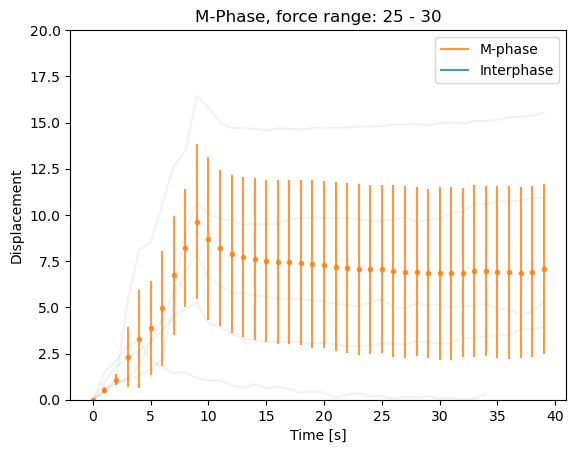

30


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


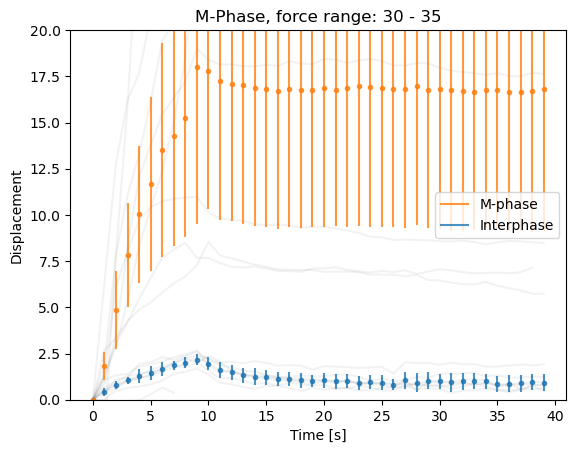

35


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


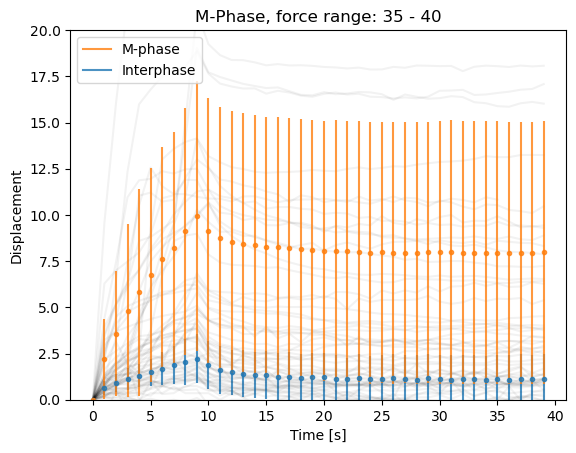

40


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


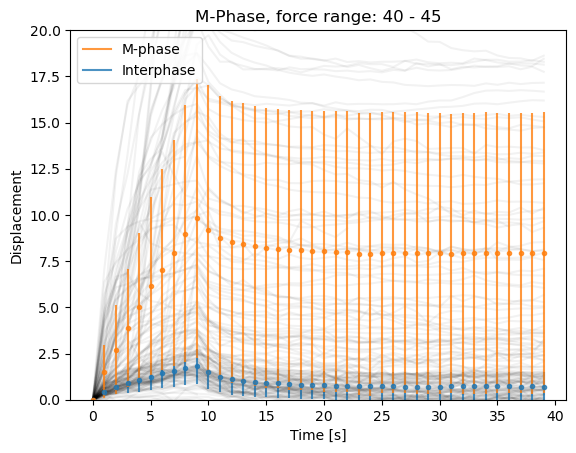

45


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


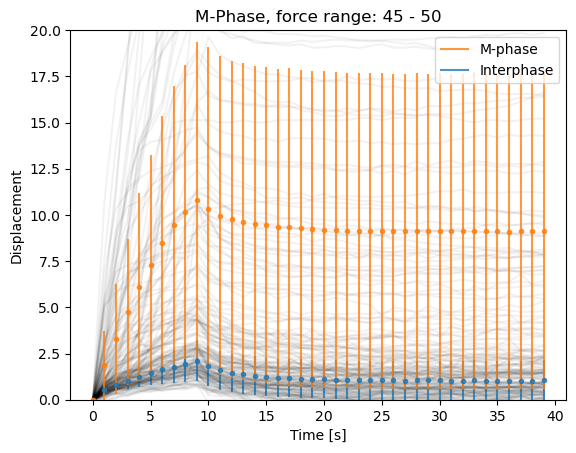

50


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


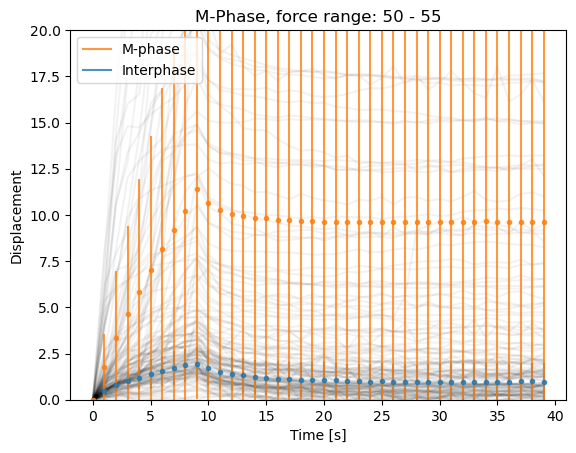

55


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


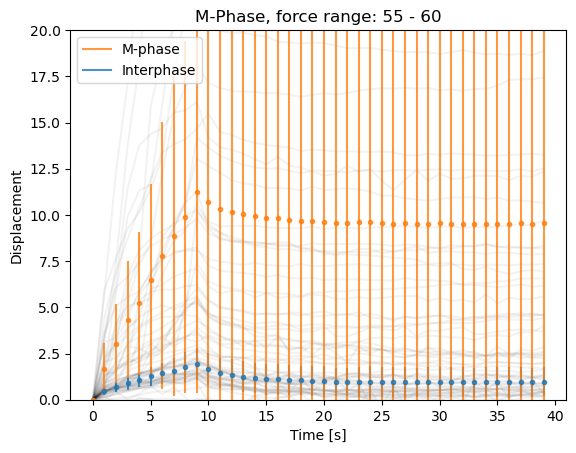

60


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


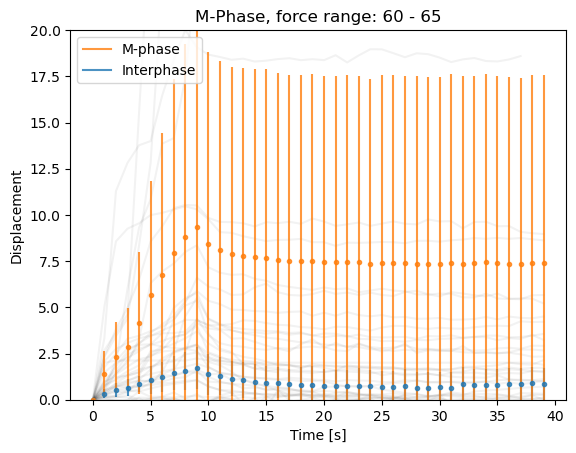

65


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


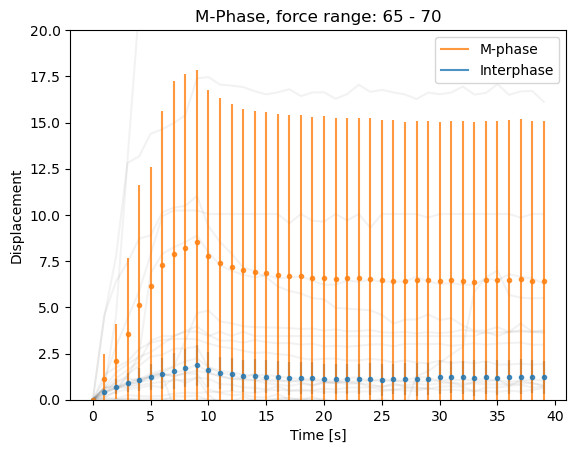

70


/var/folders/c1/95zwm3_14_j1wp412s49dvlr0000gp/T/ipykernel_9713/445592361.py:44: RuntimeWarning: Mean of empty slice
  if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:


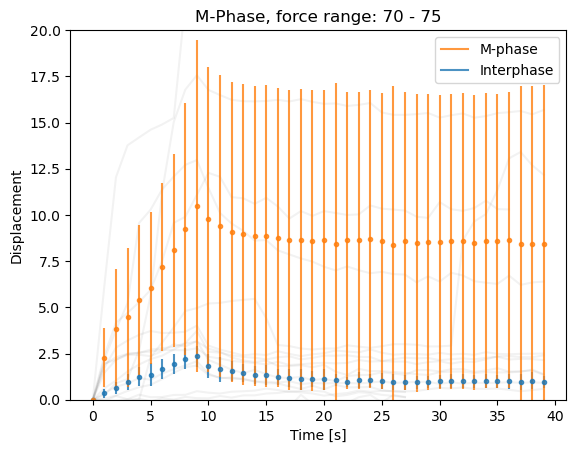

In [206]:
from scipy.stats import bootstrap

rng = np.random.default_rng()

force_window = 5
max_force = 80

for force_lower_bound in [f for f in range(25, max_force-force_window, force_window)]:
    print(force_lower_bound)
    avg_response = pd.DataFrame(columns=['POSITION_T', 'DISPLACEMENT [um]'])
    for file in df_all_tracks['file'].unique():
        for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
            for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
                df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='y')&(df_all_tracks['AVG_FORCE']>force_lower_bound)&(df_all_tracks['AVG_FORCE']<force_lower_bound+force_window)]
                if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]):
                    continue
                plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['CORRECTED DISPLACEMENT [um]'], 'k-', alpha=0.05)

                # Create a DataFrame with normalized data
                normalized_data = pd.DataFrame({
                    'POSITION_T': df['POSITION_T'] - np.min(df['POSITION_T']),
                    'DISPLACEMENT [um]': df['CORRECTED DISPLACEMENT [um]'] 
                })

                # Concatenate with avg_response
                avg_response = pd.concat([avg_response, normalized_data])
    for t in avg_response['POSITION_T'].unique():
        plt.errorbar(t, np.nanmean(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), yerr=np.nanstd(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), marker='.', color=sns.color_palette()[0], alpha=0.8)


    avg_response = pd.DataFrame(columns=['POSITION_T', 'DISPLACEMENT [um]'])
    for file in df_all_tracks['file'].unique():
        for track_id in df_all_tracks.loc[df_all_tracks['file']==file, 'TRACK_ID'].unique():
            for pulse in df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id), 'PULSE_NUMBER'].unique():
                df = df_all_tracks.loc[(df_all_tracks['file']==file)&(df_all_tracks['TRACK_ID']==track_id)&(df_all_tracks['PULSE_NUMBER']==pulse)&(df_all_tracks['MT_STATUS']=='n')&(df_all_tracks['AVG_FORCE']>force_lower_bound)&(df_all_tracks['AVG_FORCE']<force_lower_bound+force_window)]
                if len(df) <= len(df.loc[df['MAGNET_STATUS']==1]) or np.nanmean(df.loc[df['MAGNET_STATUS']==0, 'CORRECTED DISPLACEMENT [um]'])<0:
                    continue
                plt.plot(df['POSITION_T']-np.min(df['POSITION_T']), df['DISPLACEMENT [um]'], 'k-', alpha=0.05)

                # Create a DataFrame with normalized data
                normalized_data = pd.DataFrame({
                    'POSITION_T': df['POSITION_T'] - np.min(df['POSITION_T']),
                    'DISPLACEMENT [um]': df['CORRECTED DISPLACEMENT [um]']
                })

                # Concatenate with avg_response
                avg_response = pd.concat([avg_response, normalized_data])
    for t in avg_response['POSITION_T'].unique():
        plt.errorbar(t, np.nanmean(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), yerr=np.nanstd(avg_response.loc[avg_response['POSITION_T']==t, 'DISPLACEMENT [um]']), marker='.', color=sns.color_palette()[1], alpha=0.8)
        
    plt.plot([], [], color=sns.color_palette()[1], alpha=0.8, label='M-phase')
    plt.plot([], [], color=sns.color_palette()[0], alpha=0.8, label='Interphase')
    plt.ylim(0, 20)
    plt.title('M-Phase, force range: '+str(force_lower_bound)+' - '+str(force_lower_bound+force_window))
    plt.xlabel('Time [s]')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()

# Bootstrapping

The idea for this part is to compute confidence intervals for fit parameters (k, eta_1, eta_2) and get the prediction curves with the confidence intervals. Probably best to do this for force bins. I should also try to group this by embryos, maybe? 

{'label': 'y, k', 'estimate': 35.692829425922945, 'conf_int': array([33.23437397, 37.80892814])}
{'label': 'y, eta_1', 'estimate': 51.74798949916064, 'conf_int': array([48.29028987, 55.27102637])}
{'label': 'y, eta_2', 'estimate': 229.6956066126672, 'conf_int': array([196.32002467, 258.20207652])}
{'label': 'n, k', 'estimate': 27.086078522423293, 'conf_int': array([25.61017166, 28.69243975])}
{'label': 'n, eta_1', 'estimate': 27.997841988327306, 'conf_int': array([25.10420303, 31.91680524])}
{'label': 'n, eta_2', 'estimate': 46.20176644159066, 'conf_int': array([33.32916711, 56.44526111])}


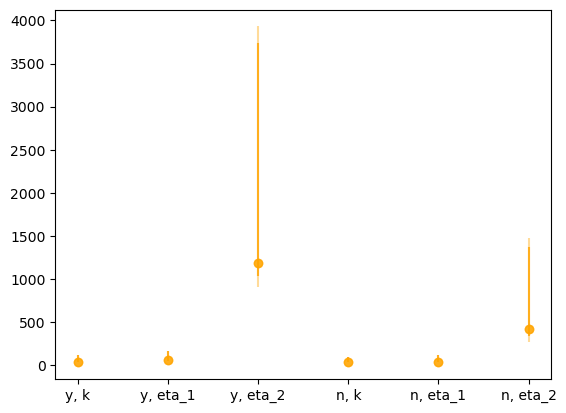

In [ ]:
rng = np.random.default_rng()
df_results_jeff_filtered = pd.read_csv('/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/results/results_jeffreys_model_filtered.csv')

summaries_95 = []
summaries_70 = []
for phase in ['y', 'n']:
    for param in ['k', 'eta_1', 'eta_2']:
        data = (df_results_jeff_filtered.loc[(df_results_jeff_filtered['MT_STATUS']==phase)&(df_results_jeff_filtered['R_SQUARED']>0.7), param].values,)
        res_95 = bootstrap(data, np.mean, confidence_level=0.95, random_state=rng)
        res_70 = bootstrap(data, np.mean, confidence_level=0.70, random_state=rng)
        summaries_95.append(dict(label=f"{phase}, {param}", estimate=np.mean(data), conf_int=np.array(res_95.confidence_interval)))
        summaries_70.append(dict(label=f"{phase}, {param}", estimate=np.mean(data), conf_int=np.array(res_70.confidence_interval)))



for s in summaries:
    print(s)

df_summaries_95 = pd.DataFrame(summaries_95)
df_summaries_70 = pd.DataFrame(summaries_70)
yerr_95 = [
    [df_summaries_95['estimate'].values[i]-df_summaries_95['conf_int'].values[i][0] for i in range(len(df_summaries))],[df_summaries_95['estimate'].values[i]+df_summaries_95['conf_int'].values[i][1] for i in range(len(df_summaries))]]

yerr_70 = [
    [df_summaries_70['estimate'].values[i]-df_summaries_70['conf_int'].values[i][0] for i in range(len(df_summaries))],[df_summaries_70['estimate'].values[i]+df_summaries_70['conf_int'].values[i][1] for i in range(len(df_summaries))]]


plt.errorbar(df_summaries_95['label'], df_summaries_95['estimate'], yerr=yerr_95, marker='o', linestyle='', color='orange', alpha=0.4)

plt.errorbar(df_summaries_70['label'], df_summaries_70['estimate'], yerr=yerr_70, marker='o', linestyle='', color='orange', alpha=0.8)
plt.show()



In [ ]:
rng = np.random.default_rng()
df_results_jeff_filtered = pd.read_csv('/Volumes/cytokinesis-zebrafish-collab/magnetic_tweezers_SD/3_plots/results/results_jeffreys_model_filtered.csv')

summaries_95 = []
summaries_70 = []
for phase in ['y', 'n']:
    for param in ['k', 'eta_1', 'eta_2']:
        data = (df_results_jeff_filtered.loc[(df_results_jeff_filtered['MT_STATUS']==phase)&(df_results_jeff_filtered['R_SQUARED']>0.7), param].values,)
        res_95 = bootstrap(data, np.mean, confidence_level=0.95, random_state=rng)
        res_70 = bootstrap(data, np.mean, confidence_level=0.70, random_state=rng)
        summaries_95.append(dict(label=f"{phase}, {param}", estimate=np.mean(data), conf_int=np.array(res_95.confidence_interval)))
        summaries_70.append(dict(label=f"{phase}, {param}", estimate=np.mean(data), conf_int=np.array(res_70.confidence_interval)))

# # Generate predictions for each bootstrap sample
# bootstrap_predictions = np.array([
#     jeff_full(time, A, r) for A, r in bootstrap_params
# ])  # Shape: (num_bootstrap, num_time_points)

# # Compute the mean and confidence intervals at each time point
# mean_prediction = np.mean(bootstrap_predictions, axis=0)
# lower_ci, upper_ci = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

,label,estimate,conf_int
0,"y, k",39.296811,"[37.31540533681755, 42.70735629174064]"
1,"y, eta_1",53.269861,"[50.78947661399813, 55.83018547615982]"
2,"y, eta_2",1185.882903,"[903.2465043618924, 1558.4580842435614]"
3,"n, k",32.276133,"[30.05909737238371, 34.808463024444016]"
4,"n, eta_1",38.422284,"[34.66177173325355, 43.55496394915957]"
